In [2]:
import json 
import pandas as pd 
import numpy 

First we need to import our data into a dataframe and get a good understanding of it and decide exaclty what we want to do and what data we will and what data we will not use

In [595]:
df_game = pd.read_csv("/Users/willaugustyn/Programming/NBA_ML_PROJECT/csv/game.csv")

In [596]:
df_game

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


In [796]:
df_game.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type', 'season'],
      dtype='object')

# I'd like to be able to predict a few things:
* Predict whether a team will win or lose a game 
* What the score will be 

In [602]:
import matplotlib.pyplot as plt

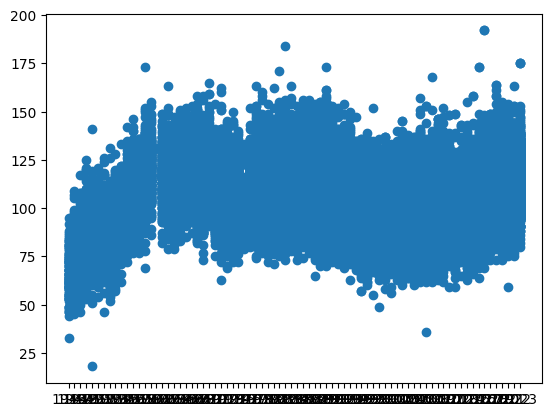

In [603]:
plt.scatter(df_game.season, df_game.pts_home)

In [604]:
"""need to come up with some way to get average for a particular time for a particular year"""

'need to come up with some way to get average for a particular time for a particular year'

In [890]:
test_df = df_game.copy()

In [891]:
import math 
import pandas as pd

def make_stats_dict(df:pd.DataFrame):
    df_game["season"] = df_game.game_date.apply(lambda x: x[0:4])
    stats = {}
    for index, row in df.iterrows():
        stats[row.season] = {}
    for index, row in df.iterrows():
        team_name = row.team_name_home
        if team_name not in stats[row.season].keys():
            stats[row.season][team_name] = {}
    for index, row in df.iterrows():
        team_name = row.team_name_home
        stats[row.season][team_name]["fg_pct"] = []
        stats[row.season][team_name]["3_pt_fg_pct"] = []
        stats[row.season][team_name]["ft_pct"] = []
        stats[row.season][team_name]["oreb"] = []
        stats[row.season][team_name]["dreb"] = []
        stats[row.season][team_name]["asist"] = []
        stats[row.season][team_name]["stl"] = []
        stats[row.season][team_name]["blk"] = []
        stats[row.season][team_name]["turnover"] = []
        stats[row.season][team_name]["allowed_pts"] = []
        stats[row.season][team_name]["made_pts"] = []
        stats[row.season][team_name]["FGA"] = []
        stats[row.season][team_name]["FTA"] = []
        stats[row.season][team_name]["win_percent"] = []
        
    return stats

def fill_stats(df:pd.DataFrame, stats:dict):
    """fill a dictionary with all values available for each stat"""
    for index, row in df.iterrows():
        if row.season_type == "Regular Season" or row.season_type == "Playoffs": 
            team_name1 = row.team_name_home 
            team_name2 = row.team_name_away
            season = row.season
            stats[season][team_name1]["fg_pct"].append(row.fg_pct_home)
            stats[season][team_name1]["3_pt_fg_pct"].append(row.fg3_pct_home)
            stats[season][team_name1]["ft_pct"].append(row.ft_pct_home)
            stats[season][team_name1]["oreb"].append(row.oreb_home)
            stats[season][team_name1]["dreb"].append(row.dreb_home)
            stats[season][team_name1]["asist"].append(row.ast_home)
            stats[season][team_name1]["stl"].append(row.stl_home)
            stats[season][team_name1]["blk"].append(row.blk_home)
            stats[season][team_name1]["turnover"].append(row.tov_home)
            stats[season][team_name1]["allowed_pts"].append(row.pts_away)
            stats[season][team_name1]["made_pts"].append(row.pts_home)
            stats[season][team_name1]["FGA"].append((row.fga_home)) # could be wrong
            stats[season][team_name1]["FTA"].append(row.fta_home)
            if row.wl_home == "W":
                stats[season][team_name1]["win_percent"].append(1)
            else:
                stats[season][team_name1]["win_percent"].append(0)
            stats[season][team_name2]["fg_pct"].append(row.fg_pct_away)
            stats[season][team_name2]["3_pt_fg_pct"].append(row.fg3_pct_away)
            stats[season][team_name2]["ft_pct"].append(row.ft_pct_away)
            stats[season][team_name2]["oreb"].append(row.oreb_away)
            stats[season][team_name2]["dreb"].append(row.dreb_away)
            stats[season][team_name2]["asist"].append(row.ast_away)
            stats[season][team_name2]["stl"].append(row.stl_away)
            stats[season][team_name2]["blk"].append(row.blk_away)
            stats[season][team_name2]["turnover"].append(row.tov_away)
            stats[season][team_name2]["allowed_pts"].append(row.pts_home)
            stats[season][team_name2]["made_pts"].append(row.pts_away)
            stats[season][team_name2]["FGA"].append(row.fga_away + row.fg3a_away)
            stats[season][team_name2]["FTA"].append(row.fta_away)
            if row.wl_away == "W":
                stats[season][team_name2]["win_percent"].append(1)
            else:
                stats[season][team_name2]["win_percent"].append(0)
            
    return stats 

def averages(stats:dict, df:pd.DataFrame):
    averages = {}
    for index, row in df.iterrows():
        averages[row.season] = {}

    for index, row in df.iterrows():
        team_name = row.team_name_home
        if team_name not in averages[row.season].keys():
            averages[row.season][team_name] = {}
            
    for season in stats:
        for team in stats[season]:
            for stat in stats[season][team]:
                ls = [str(x) for x in stats[season][team][stat]]
                X = "nan"
                while X in ls:
                    ls.remove(X)
                final = [float(x) for x in ls]
                if len(final) > 0:
                    s = sum(final)
                    avg = s/len(final)
                    averages[season][team][stat] = avg
                else:
                    averages[season][team][stat] = -1.0
    return averages
        

In [892]:

def make_df_cols(df:pd.DataFrame, averages:dict):
    home_fg_pct = []
    home_3pt_fg_pct = []
    home_ft_pct = []
    home_oreb = []
    home_dreb = []
    home_assist = []
    home_stl = []
    home_blk = []
    home_tov = []
    home_allowed_pts = []
    home_made_pts = []
    home_FGA = []
    home_FTA = []
    home_wl = []
    away_fg_pct = []
    away_3pt_fg_pct = []
    away_ft_pct = []
    away_oreb = []
    away_dreb = []
    away_assist = []
    away_stl = []
    away_blk = []
    away_tov = []
    away_allowed_pts = []
    away_made_pts = []
    away_FGA = []
    away_FTA = []
    away_wl = []

    for index, r in df.iterrows():
        try:
            home_fg_pct.append(averages[r.season][r.team_name_home]["fg_pct"])
        except:
            home_fg_pct.append(-1)
        try:
            home_3pt_fg_pct.append(averages[r.season][r.team_name_home]["3_pt_fg_pct"])
        except:
            home_3pt_fg_pct.append(-1)
        try:
            home_ft_pct.append(averages[r.season][r.team_name_home]["ft_pct"])
        except:
            home_ft_pct.append(-1)
        try:
            home_oreb.append(averages[r.season][r.team_name_home]["oreb"])
        except:
            home_oreb.append(-1)
        try:
            home_dreb.append(averages[r.season][r.team_name_home]["dreb"])
        except:
            home_dreb.append(-1)
        try:
            home_assist.append(averages[r.season][r.team_name_home]["asist"])
        except:
            home_assist.append(-1)
        try:
            home_stl.append(averages[r.season][r.team_name_home]["stl"])
        except:
            home_stl.append(-1)
        try:
            home_blk.append(averages[r.season][r.team_name_home]["blk"])
        except:
            home_blk.append(-1)
        try:
            home_tov.append(averages[r.season][r.team_name_home]["turnover"])
        except:
            home_tov.append(-1)
        try:
            home_allowed_pts.append(averages[r.season][r.team_name_home]["allowed_pts"])
        except:
            home_allowed_pts.append(-1)
        try:
            home_made_pts.append(averages[r.season][r.team_name_home]["made_pts"])
        except:
            home_made_pts.append(-1)
        try:
            home_FGA.append(averages[r.season][r.team_name_home]["FGA"])
        except:
            home_FGA.append(-1)
        try:
            home_FTA.append(averages[r.season][r.team_name_home]["FTA"])
        except:
            home_FTA.append(-1)
        try:
            home_wl.append(averages[r.season][r.team_name_home]["win_percent"])
        except:
            home_wl.append(-1)
        try:
            away_fg_pct.append(averages[r.season][r.team_name_away]["fg_pct"])
        except:
            away_fg_pct.append(-1)
        try:
            away_3pt_fg_pct.append(averages[r.season][r.team_name_away]["3_pt_fg_pct"])
        except:
            away_3pt_fg_pct.append(-1)
        try:
            away_ft_pct.append(averages[r.season][r.team_name_away]["ft_pct"])
        except:
            away_ft_pct.append(-1)
        try:
            away_oreb.append(averages[r.season][r.team_name_away]["oreb"])
        except:
            away_oreb.append(-1)
        try:
            away_dreb.append(averages[r.season][r.team_name_away]["dreb"])
        except:
            away_dreb.append(-1)
        try:
            away_assist.append(averages[r.season][r.team_name_away]["asist"])
        except:
            away_assist.append(-1)
        try:
            away_stl.append(averages[r.season][r.team_name_away]["stl"])
        except:
            away_stl.append(-1)
        try:
            away_blk.append(averages[r.season][r.team_name_away]["blk"])
        except:
            away_blk.append(-1)
        try:
            away_tov.append(averages[r.season][r.team_name_away]["turnover"])
        except:
            away_tov.append(-1)
        try:
            away_allowed_pts.append(averages[r.season][r.team_name_away]["allowed_pts"])
        except:
            away_allowed_pts.append(-1)
        try:
            away_made_pts.append(averages[r.season][r.team_name_away]["made_pts"])
        except:
            away_made_pts.append(-1)
        try:
            away_FGA.append(averages[r.season][r.team_name_away]["FGA"])
        except:
            away_FGA.append(-1)
        try:
            away_FTA.append(averages[r.season][r.team_name_away]["FTA"])
        except:
            away_FTA.append(-1)
        try:
            away_wl.append(averages[r.season][r.team_name_away]["win_percent"])
        except:
            away_wl.append(-1)
     
    df["home_fg_pct_avg"] = home_fg_pct
    df["home_3_pt_fg_pct_avg"] = home_3pt_fg_pct
    df["home_ft_pct_avg"] = home_ft_pct
    df["home_oreb_avg"] = home_oreb
    df["home_dreb_avg"] = home_dreb
    df["home_assist_avg"] = home_assist
    df["home_stl_avg"] = home_stl
    df["home_blk_avg"] = home_blk
    df["home_turnover_avg"] = home_tov
    df["home_allowed_pts_avg"] = home_allowed_pts
    df["home_made_pts_avg"] = home_made_pts
    df["home_FGA"] = home_FGA
    df["home_FTA"] = home_FTA
    df["home_win_pct"] = home_wl
    df["away_fg_pct_avg"] = away_fg_pct
    df["away_3_pt_fg_pct_avg"] = away_3pt_fg_pct
    df["away_ft_pct_avg"] = away_ft_pct
    df["away_oreb_avg"] = away_oreb
    df["away_dreb_avg"] = away_dreb
    df["away_assist_avg"] = away_assist
    df["away_stl_avg"] = away_stl
    df["away_blk_avg"] = away_blk
    df["away_turnover_avg"] = away_tov
    df["away_allowed_pts"] = away_allowed_pts
    df["away_made_pts_avg"] = away_made_pts
    df["away_FGA"] = away_FGA
    df["away_FTA"] = away_FTA
    df["away_win_pct"] = away_wl
    
    """Add upset stat"""
    stats = {}
    for index, row in df.iterrows():
        stats[row.season] = {}
    for index, row in df.iterrows():
        team_name = row.team_name_home
        if team_name not in stats[row.season].keys():
            stats[row.season][team_name] = {}
    for index, row in df.iterrows():
        team_name = row.team_name_home
        stats[row.season][team_name]["better_team"] = 1 
        stats[row.season][team_name]["upset"] = 0
    
    
    for index, row in df.iterrows():
        if row.season_type == "Regular Season" or row.season_type == "Playoffs": 
            team_name1 = row.team_name_home 
            team_name2 = row.team_name_away
            if row.home_win_pct > row.away_win_pct:
                stats[row.season][team_name2]["better_team"] += 1
            else:
                stats[row.season][team_name1]["better_team"] += 1
            if row.home_win_pct < row.away_win_pct and row.wl_home == "W":
                stats[row.season][team_name1]["upset"] += 1 
            if row.away_win_pct < row.home_win_pct and row.wl_away == "W":
                stats[row.season][team_name2]["upset"] += 1 
    
    upset_home = []
    upset_away = []
    better_team_home = []
    better_team_away = []
    for index, row in df.iterrows():
        try:
            better_team_home.append(stats[row.season][row.team_name_home]["better_team"])
        except:
            better_team_home.append(-1)
        try:
            better_team_away.append(stats[row.season][row.team_name_away]["better_team"])
        except:
            better_team_away.append(-1)
        try:
            upset_home.append(stats[row.season][row.team_name_home]["upset"])
        except:
            upset_home.append(-1)
        try:
            upset_away.append(stats[row.season][row.team_name_away]["upset"])
        except:
            upset_away.append(-1)
    
    df["home_upset"] = upset_home
    df["away_upset"] = upset_away
    df["better_team_home"] = better_team_home
    df["better_team_away"] = better_team_away
      
    return df 

In [893]:

from sklearn.preprocessing import OrdinalEncoder
def clean_df(df:pd.DataFrame):
    df.drop(["season_id", "team_abbreviation_home", 'matchup_home', "min", "fga_home", "fg3m_home", "fg3_pct_home", "fta_home", 
                      "oreb_home", "reb_home", "stl_home", "tov_home", "pts_home", "video_available_home", "team_abbreviation_away", 
                      "matchup_away", "fgm_away", "fg_pct_away", "fg3a_away", "ftm_away", "ft_pct_away", "dreb_away", "ast_away", "blk_away", 
                      "pf_away", "plus_minus_away", "team_id_home", "fgm_home", "fg_pct_home", "fg3a_home", "ftm_home", "ft_pct_home", "dreb_home", 
                      "ast_home", "blk_home", "pf_home", "plus_minus_home", "team_id_away", "wl_away", "fga_away", "fg3m_away", "fg3_pct_away", 
                      "fta_away", "oreb_away", "reb_away", "stl_away", "tov_away", "pts_away", "video_available_away", 
                    "game_date"], axis=1, inplace=True)
    df = df[df.home_3_pt_fg_pct_avg != -1]
    df = df[(df.season_type == "Regular Season") | (df.season_type == "Playoffs")]
    df = df[df.home_fg_pct_avg != -1]
    df = df[df.home_ft_pct_avg != -1]
    df = df[df.home_oreb_avg != -1]
    df = df[df.home_dreb_avg!= -1]
    df = df[df.home_assist_avg != -1]
    df = df[df.home_stl_avg != -1]
    df = df[df.home_blk_avg != -1]
    df = df[df.home_turnover_avg != -1]
    df = df[df.away_fg_pct_avg != -1]
    df = df[df.away_3_pt_fg_pct_avg != -1]
    df = df[df.away_ft_pct_avg != -1]
    df = df[df.away_oreb_avg != -1]
    df = df[df.away_dreb_avg != -1]
    df = df[df.away_assist_avg != -1]
    df = df[df.away_stl_avg != -1]
    df = df[df.away_blk_avg != -1]
    df = df[df.away_turnover_avg != -1]
    #make W/L column 0 or 1 
    def transform_wl(value):
      return 0 if value == 'L' else 1
    # Apply the function to the 'wl_home' column
    df['wl_home'] = df['wl_home'].apply(transform_wl)
    def calculate(upset, better_team):
      return upset/better_team
    df['upset_pct_home'] = df.apply(lambda x: calculate(x.home_upset, x.better_team_home), axis=1)
    df['upset_pct_away'] = df.apply(lambda x: calculate(x.away_upset, x.better_team_away), axis=1)
    df.drop(["better_team_home", "better_team_away", "home_upset", "away_upset"], axis=1)
    
    return df

In [894]:
stats_test = make_stats_dict(test_df)
filled = fill_stats(test_df, stats_test)


In [895]:
average_test = averages(filled, test_df)

In [896]:
test_df_out = make_df_cols(test_df, average_test)

In [897]:
final = clean_df(test_df_out)

In [898]:
final

,team_name_home,game_id,wl_home,team_name_away,season_type,season,home_fg_pct_avg,home_3_pt_fg_pct_avg,home_ft_pct_avg,home_oreb_avg,...,away_made_pts_avg,away_FGA,away_FTA,away_win_pct,home_upset,away_upset,better_team_home,better_team_away,upset_pct_home,upset_pct_away
13776,Los Angeles Lakers,27900560,1,Philadelphia 76ers,Regular Season,1980,0.489167,0.000000,0.764816,17.166667,...,108.843137,89.333333,30.254902,0.754902,7,0,11,1,0.636364,0.000000
13853,Philadelphia 76ers,27900627,1,Los Angeles Lakers,Regular Season,1980,0.488000,0.050000,0.770147,9.500000,...,113.081633,92.500000,25.367347,0.714286,0,7,1,11,0.000000,0.636364
14165,Los Angeles Lakers,47900043,1,Philadelphia 76ers,Playoffs,1980,0.489167,0.000000,0.764816,17.166667,...,108.843137,89.333333,30.254902,0.754902,7,0,11,1,0.636364,0.000000
14166,Los Angeles Lakers,47900044,0,Philadelphia 76ers,Playoffs,1980,0.489167,0.000000,0.764816,17.166667,...,108.843137,89.333333,30.254902,0.754902,7,0,11,1,0.636364,0.000000
14167,Philadelphia 76ers,47900045,0,Los Angeles Lakers,Playoffs,1980,0.488000,0.050000,0.770147,9.500000,...,113.081633,92.500000,25.367347,0.714286,0,7,1,11,0.000000,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65691,Denver Nuggets,42200401,1,Miami Heat,Playoffs,2023,0.499373,0.367358,0.772433,10.119403,...,109.352941,103.573529,22.558824,0.558824,2,22,5,42,0.400000,0.523810
65692,Denver Nuggets,42200402,0,Miami Heat,Playoffs,2023,0.499373,0.367358,0.772433,10.119403,...,109.352941,103.573529,22.558824,0.558824,2,22,5,42,0.400000,0.523810
65693,Miami Heat,42200403,0,Denver Nuggets,Playoffs,2023,0.463765,0.359809,0.826309,9.676471,...,114.776119,100.626866,21.925373,0.686567,22,2,42,5,0.523810,0.400000
65694,Miami Heat,42200404,0,Denver Nuggets,Playoffs,2023,0.463765,0.359809,0.826309,9.676471,...,114.776119,100.626866,21.925373,0.686567,22,2,42,5,0.523810,0.400000


Now that I have these functions lets finally add our other needed stats, making use of this new functionality

### Finally ready to start exploring data!! 
Note we can add more columns as needed now to this perfected DataFrame

Seem to be missing roughly 20 % for most stats, best to just drop I'm thinking because most of the missing values are probably all in the same rows 

OK! At this point the data is cleaned, there are no Null values for any column, all game types are regular season or playoffs. Next step is going to be to split the data into test and train. From here we need to do some more feature adding maybe, also look at most important stats. Need to decide feature engineering too. Basically keep looking at ML project checklist on page 758

In [899]:
def get_offensive_defensive_rating(df:pd.DataFrame):
    
    def calculate_poss(FGA, oreb, tov, Y, FTA):
        return (FGA - oreb + tov + (Y*FTA))
    
    def calculate_offensive_rating(pts, poss):
        return (pts/poss) * 100
    def calculate_defensive_rating(pts_allowed, poss):
        return (pts_allowed/poss) * 100
    
    df["possessions_home"] = df.apply(lambda row: calculate_poss(row.home_FGA, row.home_oreb_avg, row.home_turnover_avg, 0.44, row.home_FTA), axis=1)
    df["possessions_away"] = df.apply(lambda row: calculate_poss(row.away_FGA, row.away_oreb_avg, row.away_turnover_avg, 0.44, row.away_FTA), axis=1)
    
    df["home_offensive_rating"] = df.apply(lambda row: calculate_offensive_rating(row.home_made_pts_avg, row.possessions_home), axis=1)
    df["home_defensive_rating"] = df.apply(lambda row: calculate_defensive_rating(row.home_allowed_pts_avg, row.possessions_home), axis=1)
    
    df["away_offensive_rating"] = df.apply(lambda row: calculate_offensive_rating(row.away_made_pts_avg, row.possessions_away), axis=1)
    df["away_defensive_rating"] = df.apply(lambda row: calculate_offensive_rating(row.away_allowed_pts, row.possessions_away), axis=1)
    
    return df 
        

In [900]:
final2 = get_offensive_defensive_rating(final)

In [887]:
final2.columns

Index(['team_name_home', 'game_id', 'wl_home', 'team_name_away', 'season_type',
       'season', 'home_fg_pct_avg', 'home_3_pt_fg_pct_avg', 'home_ft_pct_avg',
       'home_oreb_avg', 'home_dreb_avg', 'home_assist_avg', 'home_stl_avg',
       'home_blk_avg', 'home_turnover_avg', 'home_allowed_pts_avg',
       'home_made_pts_avg', 'home_FGA', 'home_FTA', 'home_win_pct',
       'away_fg_pct_avg', 'away_3_pt_fg_pct_avg', 'away_ft_pct_avg',
       'away_oreb_avg', 'away_dreb_avg', 'away_assist_avg', 'away_stl_avg',
       'away_blk_avg', 'away_turnover_avg', 'away_allowed_pts',
       'away_made_pts_avg', 'away_FGA', 'away_FTA', 'away_win_pct',
       'home_upset', 'away_upset', 'better_team_home', 'better_team_away',
       'upset_pct_home', 'upset_pct_away', 'possessions_home',
       'possessions_away', 'home_offensive_rating', 'home_defensive_rating',
       'away_offensive_rating', 'away_defensive_rating'],
      dtype='object')

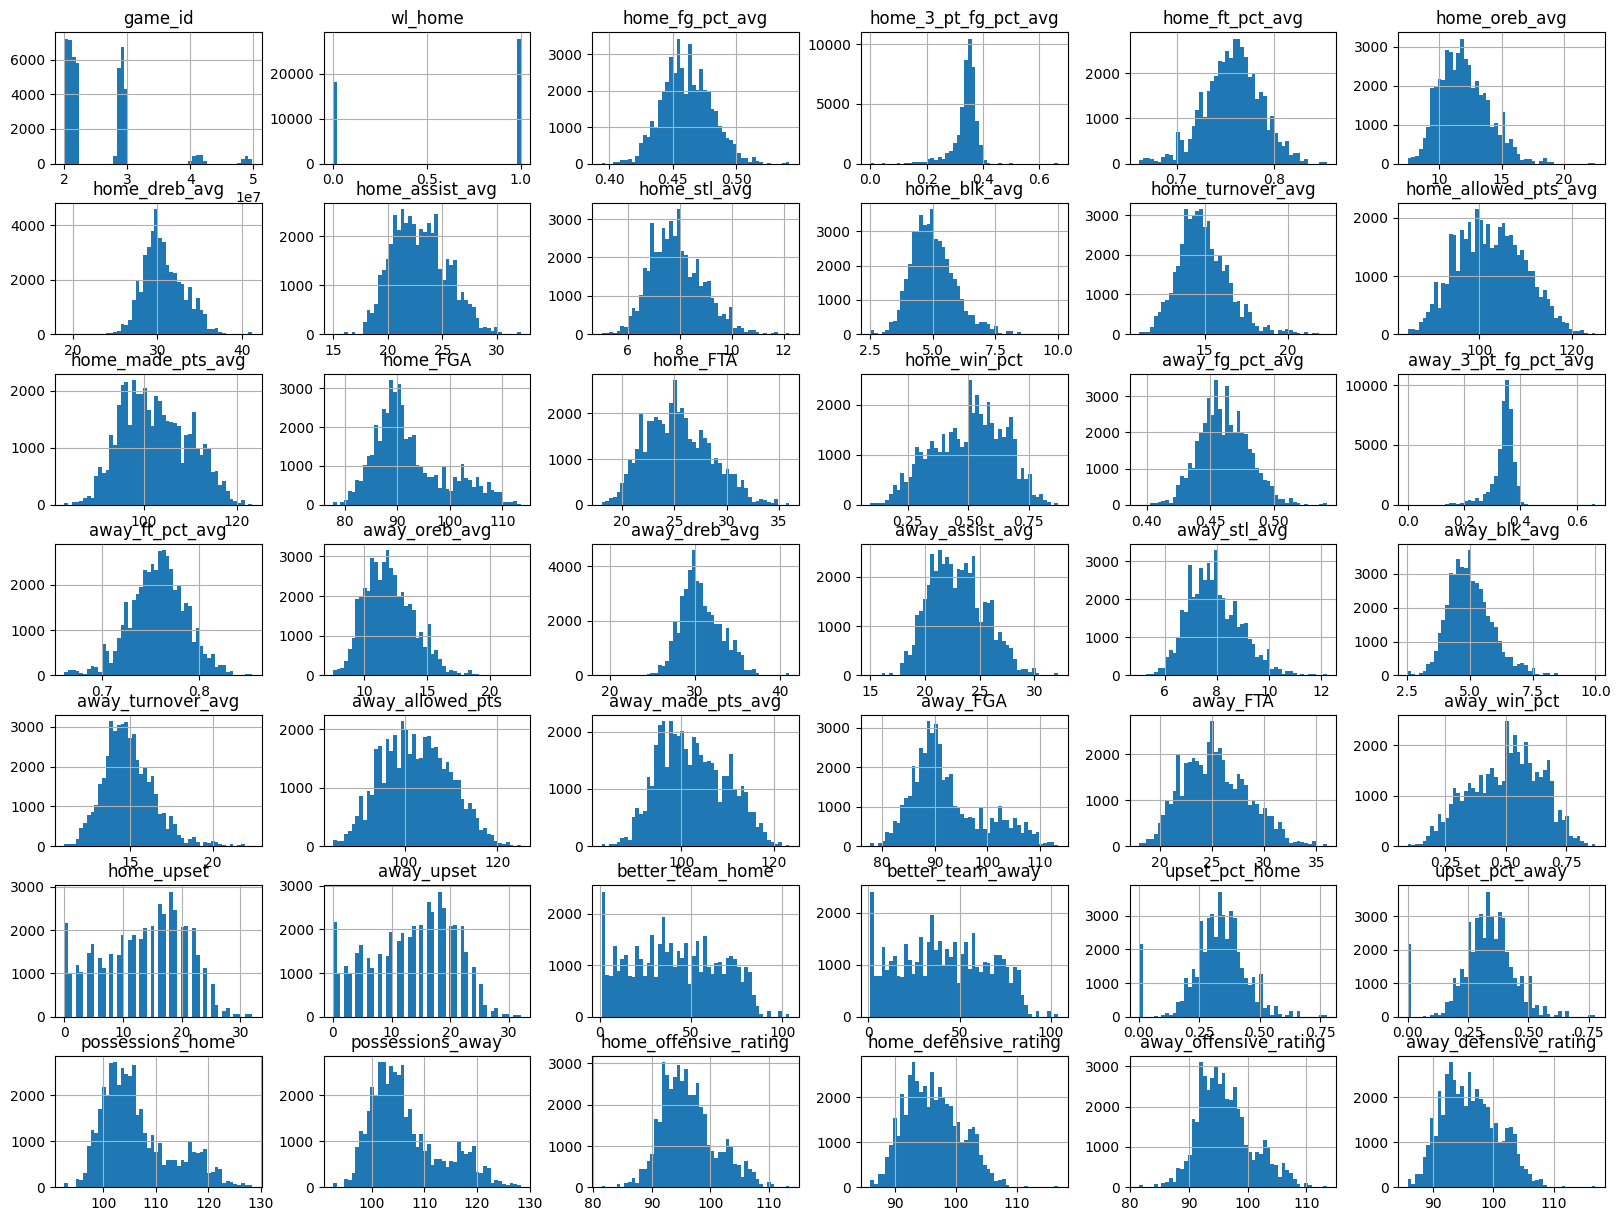

In [888]:
%matplotlib inline 
import matplotlib.pyplot as plt 
final2.hist(bins=50, figsize=(20, 15))
plt.show()

In [629]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 9.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 9.7 MB/s eta 0:00:0000:01m00:01
Note: you may need to restart the kernel to use updated packages.


In [901]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(final2, test_size=0.2, random_state=42)

In [902]:
train = train_set.copy()

In [903]:
train_numeric = train.drop(["team_name_home", "team_name_away", "game_id", "season_type", "season"], axis=1)

In [904]:
corr_matrix = train.corr(numeric_only=True)

In [905]:
corr_matrix["wl_home"].sort_values(ascending = False)

wl_home                  1.000000
home_win_pct             0.310002
better_team_away         0.255585
away_upset               0.200640
home_offensive_rating    0.172258
home_fg_pct_avg          0.167799
away_defensive_rating    0.157958
away_turnover_avg        0.114518
home_assist_avg          0.102552
away_allowed_pts         0.095990
home_made_pts_avg        0.091338
home_FTA                 0.078894
upset_pct_home           0.074872
home_blk_avg             0.069627
away_oreb_avg            0.065900
home_ft_pct_avg          0.060128
home_dreb_avg            0.056380
home_3_pt_fg_pct_avg     0.050058
home_stl_avg             0.048452
game_id                  0.034359
home_oreb_avg            0.006487
away_stl_avg             0.004334
away_FTA                 0.003582
possessions_away        -0.011108
away_FGA                -0.017861
home_FGA                -0.027917
possessions_home        -0.029557
upset_pct_away          -0.038421
away_blk_avg            -0.038511
away_ft_pct_av

Next I am going to scale the values. I am going to use standarization to do this for a couple of reasons. 1) we may have some outliers and standardization is not sensitive to outliers and 2)standardization only breaks down for neural networks which expect a value between 0 and 1. 

In [906]:
train_numeric

,wl_home,home_fg_pct_avg,home_3_pt_fg_pct_avg,home_ft_pct_avg,home_oreb_avg,home_dreb_avg,home_assist_avg,home_stl_avg,home_blk_avg,home_turnover_avg,...,better_team_home,better_team_away,upset_pct_home,upset_pct_away,possessions_home,possessions_away,home_offensive_rating,home_defensive_rating,away_offensive_rating,away_defensive_rating
49831,0,0.462554,0.343904,0.736217,12.096386,30.000000,19.084337,8.566265,4.987952,14.819277,...,54,81,0.388889,0.197531,103.836627,101.483855,97.337801,98.347265,91.853889,98.870258
63919,0,0.501697,0.370146,0.785393,9.910112,34.112360,28.786517,7.112360,3.831461,15.235955,...,15,48,0.400000,0.500000,117.612584,121.740935,99.135230,96.957063,92.889144,91.284695
16370,1,0.445933,0.361333,0.736274,22.000000,30.000000,22.827586,5.000000,4.333333,15.666667,...,55,26,0.381818,0.423077,94.817460,104.476930,108.391228,111.442203,107.200700,106.193699
21169,0,0.484084,0.303519,0.779663,12.939759,30.120482,26.156627,7.722892,3.855422,15.506024,...,41,8,0.292683,0.375000,103.543133,100.999121,102.465883,102.966228,106.529053,100.588407
22831,1,0.485214,0.285964,0.786333,13.523810,28.690476,24.678571,7.797619,4.297619,14.428571,...,32,57,0.406250,0.456140,104.160952,104.989880,104.600024,103.068511,102.649022,103.980189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29326,0,0.458106,0.322388,0.738424,14.447059,29.047059,24.458824,10.329412,5.305882,14.800000,...,37,49,0.459459,0.387755,101.538824,105.202927,97.603930,94.162766,99.204325,99.540493
64287,0,0.474872,0.373543,0.823681,8.425532,33.010638,24.265957,7.648936,4.765957,13.627660,...,11,29,0.363636,0.413793,113.788936,116.912079,97.913644,94.697536,93.605079,91.403204
57410,1,0.448439,0.344805,0.725561,11.341463,33.804878,21.475610,7.317073,3.634146,12.756098,...,38,29,0.368421,0.482759,111.951707,117.567308,91.895024,92.396112,94.487609,92.271203
18860,1,0.471430,0.258903,0.767058,14.852941,27.529412,22.313953,9.205882,4.400000,17.142857,...,87,68,0.275862,0.279412,108.887358,106.687461,102.463472,108.027148,101.519561,107.756771


In [907]:
train_numeric.columns

Index(['wl_home', 'home_fg_pct_avg', 'home_3_pt_fg_pct_avg', 'home_ft_pct_avg',
       'home_oreb_avg', 'home_dreb_avg', 'home_assist_avg', 'home_stl_avg',
       'home_blk_avg', 'home_turnover_avg', 'home_allowed_pts_avg',
       'home_made_pts_avg', 'home_FGA', 'home_FTA', 'home_win_pct',
       'away_fg_pct_avg', 'away_3_pt_fg_pct_avg', 'away_ft_pct_avg',
       'away_oreb_avg', 'away_dreb_avg', 'away_assist_avg', 'away_stl_avg',
       'away_blk_avg', 'away_turnover_avg', 'away_allowed_pts',
       'away_made_pts_avg', 'away_FGA', 'away_FTA', 'away_win_pct',
       'home_upset', 'away_upset', 'better_team_home', 'better_team_away',
       'upset_pct_home', 'upset_pct_away', 'possessions_home',
       'possessions_away', 'home_offensive_rating', 'home_defensive_rating',
       'away_offensive_rating', 'away_defensive_rating'],
      dtype='object')

In [908]:
train_ = train_numeric.drop("wl_home", axis=1)
train_labels = train_numeric["wl_home"].copy()

In [909]:
train_labels

49831    0
63919    0
16370    1
21169    0
22831    1
        ..
29326    0
64287    0
57410    1
18860    1
33843    1
Name: wl_home, Length: 36856, dtype: int64

In [910]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

train_transform = num_pipeline.fit_transform(train_)

In [911]:
train_transform

array([[ 0.07292743,  0.09782903, -0.72832107, ...,  0.46944104,
        -0.93653609,  0.59071849],
       [ 2.09936574,  0.74138888,  0.97220259, ...,  0.16408936,
        -0.71344513, -1.0706016 ],
       [-0.78755085,  0.52526877, -0.72635201, ...,  3.34568729,
         2.37060379,  2.19463127],
       ...,
       [-0.65782894,  0.11993127, -1.09680269, ..., -0.83770387,
        -0.36898607, -0.85454573],
       [ 0.53244684, -1.9866879 ,  0.33817266, ...,  2.59558526,
         1.1463547 ,  2.53696095],
       [ 0.27386415,  0.60411352, -0.18421227, ...,  0.19167758,
        -0.044664  ,  0.14657125]])

In [912]:
train_labels = numpy.array(train_labels)

In [913]:
train_labels

array([0, 0, 1, ..., 1, 1, 1])

## Model time!

In [930]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss="perceptron", penalty="elasticnet")
sgd_clf.fit(train_transform, train_labels)



SGDClassifier(loss='perceptron', penalty='elasticnet', random_state=42)

In [939]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_transform, train_labels, cv=3)

In [940]:
print(len([x for x in train_labels if x == 1]))
print(len([x for x in y_train_pred if x == 1]))

22291
22880


In [941]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_labels, y_train_pred)
"""First row of matrix represents losses, second row represents wins"""

'First row of matrix represents losses, second row represents wins'

In [942]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_labels, y_train_pred)


0.6601835664335665

Hometeam wins about 60% of the time so this is honestly pretty good!

In [706]:
y_scores = cross_val_predict(sgd_clf, train_transform, train_labels, cv=3, method="decision_function")

In [707]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshholds = precision_recall_curve(train_labels, y_scores)

In [708]:
def plot_prec_recall_curve(precisions, recalls, threshholds):
    plt.plot(threshholds, precisions[:-1], "b--", label="precision")
    plt.plot(threshholds, recalls[:-1], "g-", label="recall")

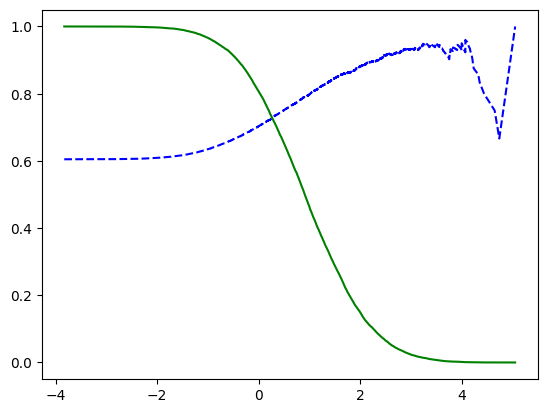

In [709]:
plot_prec_recall_curve(precisions, recalls, threshholds)
plt.show()

In [711]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_labels, y_scores)

0.719687361642493

### Random Forest 

In [712]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_transform, train_labels, cv=3, method="predict_proba")

In [713]:
y_predict_forest = cross_val_predict(forest_clf, train_transform, train_labels)

In [714]:
confusion_matrix(train_labels, y_predict_forest)

array([[ 6951,  7614],
       [ 6029, 16262]])

In [718]:
precision_score(train_labels, y_predict_forest)

0.6811023622047244

In [719]:
roc_auc_score(train_labels, y_predict_forest)

0.6033860284807809

### SVM

In [721]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5)
svm_predict = cross_val_predict(svm_clf, train_transform, train_labels, cv=3)

In [722]:
roc_auc_score(train_labels, svm_predict)

0.6366364418294277

### Logistic Regression

In [724]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
LR_predict = cross_val_predict(log_reg, train_transform, train_labels, cv=5)

In [725]:
roc_auc_score(train_labels, LR_predict)

0.6566624289584806

### Ensemble 

In [735]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [736]:
import xgboost

xgb_clf = xgboost.XGBClassifier()

In [737]:
xgb_pred = cross_val_predict(xgb_clf, train_transform, train_labels, cv=3)

In [738]:
roc_auc_score(xgb_pred, train_labels)

0.6366838475360861

### Ensemble

In [763]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

xgb_clf_2 = xgboost.XGBClassifier()
rnd_clf_2 = RandomForestClassifier()
log_reg_2 = LogisticRegression()
sgd_clf_2 = SGDClassifier(loss="modified_huber")
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1
)

voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf_2), ('rf', rnd_clf_2), ('lr', log_reg_2), ('sgd', sgd_clf_2)], 
    voting='soft'
)
voting_clf.fit(train_transform, train_labels)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression()),
                             ('sgd', SGDClassifier(loss='modified_huber'))],
                 voting='soft')

In [764]:
voting_clf_pred = cross_val_predict(voting_clf, train_transform, train_labels, cv=3)

In [765]:
precision_score(train_labels, voting_clf_pred)

0.7016798457846493

### Predictions

In [786]:
sgd_clf_3 = SGDClassifier()
y_train_pred = cross_val_predict(sgd_clf_3, train_transform, train_labels, cv=3)

In [787]:
precision_score(train_labels, y_train_pred)

0.7127663926044095

In [840]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter': [50, 200, 1000, 10000], 'alpha':[0.01, 0.0001, 0.00001], "penalty" : ["l2", "l1", "elasticnet"], "loss":["log_loss"]},
    {'max_iter': [50, 200, 1000, 10000], 'alpha':[0.01, 0.0001, 0.00001], "penalty" : ["l2", "l1", "elasticnet"], "loss":["modified_huber"]}, 
    {'max_iter': [50, 200, 1000, 10000], 'alpha':[0.01, 0.0001, 0.00001], "penalty" : ["l2", "l1", "elasticnet"], "loss":["perceptron"]}, 
]

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring="precision", return_train_score=True)
grid_search.fit(train_transform, train_labels)

/Users/willaugustyn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/willaugustyn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/willaugustyn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/willaugustyn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve th

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid=[{'alpha': [0.01, 0.0001, 1e-05], 'loss': ['log_loss'],
                          'max_iter': [50, 200, 1000, 10000],
                          'penalty': ['l2', 'l1', 'elasticnet']},
                         {'alpha': [0.01, 0.0001, 1e-05],
                          'loss': ['modified_huber'],
                          'max_iter': [50, 200, 1000, 10000],
                          'penalty': ['l2', 'l1', 'elasticnet']},
                         {'alpha': [0.01, 0.0001, 1e-05],
                          'loss': ['perceptron'],
                          'max_iter': [50, 200, 1000, 10000],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             return_train_score=True, scoring='precision')

In [792]:
grid_search.best_params_

{'alpha': 0.01, 'loss': 'perceptron', 'max_iter': 50, 'penalty': 'elasticnet'}

In [794]:
scores = grid_search.cv_results_
for score, params in zip(scores["mean_test_score"], scores["params"]):
    print(score, params)

0.7098638436875574 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 50, 'penalty': 'l2'}
0.7021778674097752 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 50, 'penalty': 'l1'}
0.7085562640159423 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 50, 'penalty': 'elasticnet'}
0.7098638436875574 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 200, 'penalty': 'l2'}
0.7021778674097752 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 200, 'penalty': 'l1'}
0.7085562640159423 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 200, 'penalty': 'elasticnet'}
0.7098638436875574 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l2'}
0.7021778674097752 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l1'}
0.7085562640159423 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'elasticnet'}
0.7098638436875574 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 10000, 'penalty': 'l2'}
0.7021778674097752 {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 10000, 'penalty':

In [795]:
grid_search.best_score_

0.7178562700963853